Проект: Анализ данных интернет-магазина «Стримчик». 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Задачи:
1. Открыть файл с данными и изучить общую информацию
2. Подготовка данных:
2.1 Приведение столбцов к нижнему регистру
2.2 Преобразование данных к нужному типу
2.3 Обработка пропусков при необходимости:
- нужно объяснить, почему заполнили пропуски определённым образом или почему не стали это делать
- описание причин, которые могли привести к пропускам
- обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать
2.4 Подтсчитать суммарные продажи во всех регионах и записать эти данные в отдельный столбец.
3. Исследовательский анализ данных
3.1 Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
3.2 Как менялись продажи по платформам. Нужно выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3.3 Используем данные за соответсвующий актуальный период. Основной фактор при выборе периода - эти данные помогут построить прогноз на 2017 год.
3.4 Данные за предыдущий период в работу не берем
3.5 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
3.6 Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.
3.7 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов.
3.8 Соотнесем выводы с продажами игр на других платформах
3.9 Выводы о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами?
4. Составление портрета пользователя каждого региона.
Определение для пользователя каждого региона (NA, EU, JP):
4.1 Самые популярные платформы (топ-5). Описание различия в долях продаж.
4.2 Самые популярные жанры (топ-5). Пояснение разницы.
4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверка гипотез
5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
Пороговое значение alpha зададим самостоятельно. 
Необходимо пояснить:
5.3 Как сформулирована нулевая и альтернативная гипотезы
5.4 Какой критерий применили для проверки гипотез и почему.
6. Общий вывод по проекту. 

Шаг 1

In [1]:
import pandas as pd
print (pd.__version__)

1.2.4


In [1]:
#загрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

прочитаем файл с данными

In [2]:
try:
    strim = pd.read_csv('C:/Users/user/Downloads/games.csv')
except:
    strim = pd.read_csv('/datasets/games.csv')

In [4]:
#выведем на экран 5 строк датафрейма
strim.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#изучим общую информацию о датафрейме
strim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выводы:
1. В рассматриваемом датафрейме 11 колонок, 16715 записей. 
2. Названия столбцов не соответствуют правилам хорошего стиля, их необходимо привести к нижнему регистру. 
3. Тип данных в столбцах Year_of_Release и Critic_Score нужно заменить на int, User_Score на float
4. Многие столбцы содержат пропущенные значения NaN

2. Подготовка данных:
2.1 Приведение столбцов к нижнему регистру

In [6]:
strim.columns = strim.columns.str.lower()

In [7]:
strim.head() #выведем первые 5 строк, чтобы проверить привелись ли названия столбцов к нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Удалим полные дубликаты

In [8]:
strim = strim.drop_duplicates()

In [9]:
strim = strim.drop_duplicates(['name', 'platform', 'year_of_release'])
print(strim[strim.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Обработка пропусков

In [10]:
strim.isna().sum() #посмотрим количество пропусков в каждом столбце

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [11]:
strim = strim.dropna(subset=['name']) #избавились от пропусков в столбце name

In [12]:
strim = strim.dropna(subset=['year_of_release']) #избавились от пропусков в столбце year_of_release

In [13]:
strim.isna().sum() #проверим

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [14]:
strim['critic_score'].unique() #выведем уникальные значения столбца critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [15]:
#Пропусков в столбце critic_score на вид достаточно много, посчитаем их процент от всех данных
(strim['critic_score'].isna().sum() / len(strim['name'])*100).round() 

51.0

In [16]:
#51% это достаточно много, избавимся от этих пропусков, заменим их на -1
strim['critic_score'] = strim['critic_score'].fillna(-1)

In [17]:
strim['user_score'].unique() #выведем уникальные значения столбца 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
#Пропусков в столбце user_score на вид достаточно много, посчитаем их процент от всех данных
(strim['user_score'].isna().sum() / len(strim['user_score'])*100).round()

40.0

In [19]:
strim['user_score'] = strim['user_score'].fillna(-1)
strim['user_score'].value_counts() 

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.2       2
0.5       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

в столбце встречается аббревиатура 'tbd'. Согласно открытым источникам, данное сокращение расшифровывается как To Be Determined, то есть "Будет определено". В нашей работе это означает, что рейтинг игры не определен, поэтому целесообразно для дальшейшей работы заменить его на -1

In [20]:
strim.loc[strim['user_score'] == 'tbd', 'user_score'] = -1
strim['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
0.3       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [21]:
#Выведем уникальные значения столбца rating
strim['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
#Пропусков в столбце rating много, посчитаем их процент
(strim['rating'].isna().sum() / len(strim['rating'])*100).round()

41.0

In [23]:
#заменим пропущенные значения в столбце rating на unknown
strim['rating'] = strim['rating'].fillna('unknown')

In [24]:
strim.isna().sum() #проверим удаление пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски удалены

2.2 Преобразование данных к нужному типу
Тип данных в столбцах year_of_release и critic_score нужно заменить на int, user_score на float

In [25]:
strim.info() #проверим типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [26]:
strim[['year_of_release']] = strim[['year_of_release']].astype('Int64')
strim['user_score'] = (strim['user_score']).astype('float')
strim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


2.4 посчитаем сумму продаж и запишем данные в новый столбец sum_sales

In [27]:
strim['sum_sales'] = strim['na_sales'] + strim['eu_sales'] + strim['jp_sales'] + strim['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Молодец, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
`= data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)`

In [28]:
strim.head() #проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


Вывод:
1. Привели столбцы к нижнему регистру согласно правилам хорошего стиля
2. Явных дубликатов не оказалось, после команды .drop_duplicates() размеры датайфрейма не изменились
3. Тип данных float64 в столбцах year_of_release заменили на int, тип данных столбца user_score object заменили на float
4. Нашли пропуски. Пропусков в столбце name 2, year_of_release 269, critic_score 8578, user_score 6701, rating 6766
4.1 Пропуски в столбцах name и year_of_release 269 удалили. Возможно к потере данных привел человеческий фактор.
4.2 Пропусков в столбцах critic_score, user_score и rating достаточно много, пропуски в user_score заменили на -1, пропуски в critic_score заменили на -1, пропуски в rating заменили на unknown
5. В столбце user_score встречается аббревиатура 'tbd'. Согласно открытым источникам, данное сокращение расшифровывается как To Be Determined, то есть "Будет определено". В нашей работе это означает, что рейтинг игры не определен, поэтому целесообразно для дальшейшей работы заменить его на -1. Возможно игра недавно в релизе и ещё не собрала оценки. 
6. Посчитали суммарные продажи и записали данные в новый столбец sum_sales

In [29]:
# Комментарий ревьюера 0
# Посмотрим, что у нас осталось
temp = strim.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

3. Исследовательский анализ данных

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

В задаче указано, что данные имеются о играх до 2016 года, найдем минимальный год 

In [30]:
strim['year_of_release'].min()

1980

Мы имеем данные с 1980 по 2016 год. Построим гистрограмму 

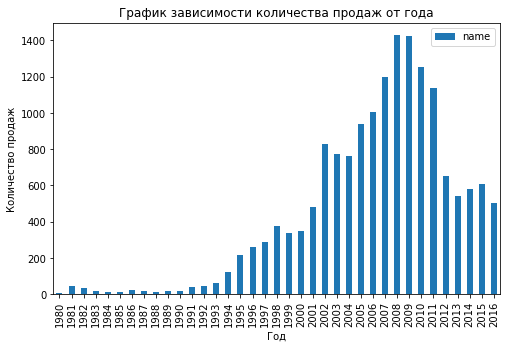

In [31]:
strim.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(8, 5))
plt.title('График зависимости количества продаж от года')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

In [32]:
strim['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

методом describe определили, что минимальный год в датафрейме 1980, максимальный 2016. Первый квартиль 2003 год, второй 2010. Среднее значение 2006.
Рост выпуска игр начинается в 1995 году, пик приходится на 2008 год, после чего идет спад. В рамках работы целесообразно взять период в последние 5 лет

Выводы: 
1. пик выпуска игр приходится на 2008 год.
2. данные представлены с 1980 по 2016 год.
3. наибольшее количество игр выпускалось с 2002 по 2012 годы. 
4. данные важны не за все периоды, поскольку до 1994 года игр выпускалось достаточно мало относительно последующих годов.

Выводы: 
1. пик выпуска игр приходится на 2008 год.
2. данные представлены с 1980 по 2016 год.
3. наибольшее количество игр выпускалось с 2002 по 2012 годы. 
4. данные важны не за все периоды, поскольку до 1994 года игр выпускалось достаточно мало относительно последующих годов.

3.2 Как менялись продажи по платформам. Нужно выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Построим график зависимости продаж от платформы

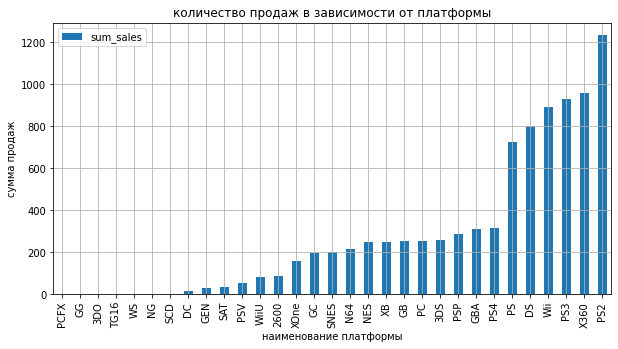

In [33]:
top_platform = strim.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales').plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('количество продаж в зависимости от платформы')
plt.xlabel('наименование платформы')
plt.ylabel('сумма продаж')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Из графика видно, что наибольшие продажи наблюдаются у следующих платформ: PS2, X360, PS3, Wii, DS, PS, PS4.
создадим таблицу top15, где оставим данные только у 15 самых популярных платформ

In [34]:
top15 = strim.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().head(15)['platform']
top15

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP
9      3DS
10      PC
11      GB
12      XB
13     NES
14     N64
Name: platform, dtype: object

Построим графики зависимости количеста продаж от года выпуска для каждой из топ15 платформ

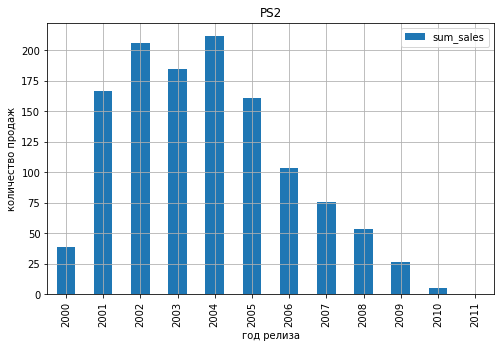

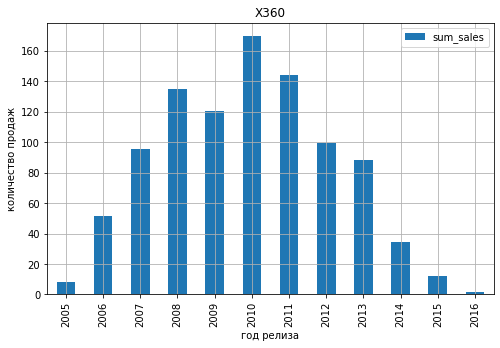

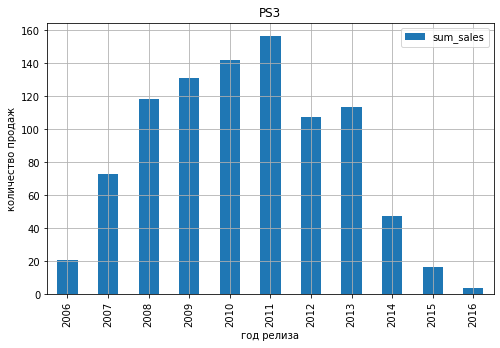

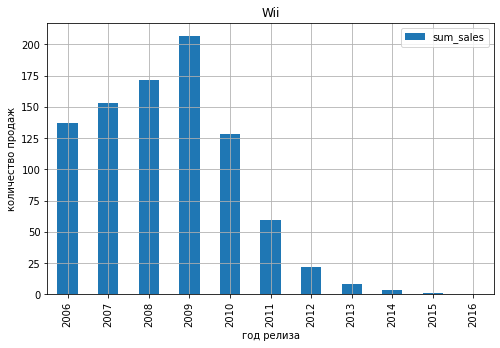

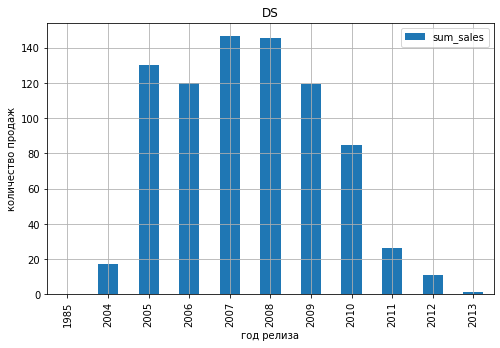

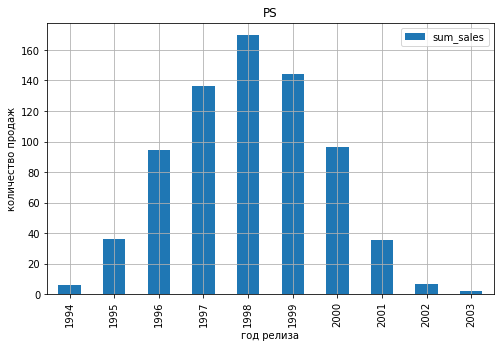

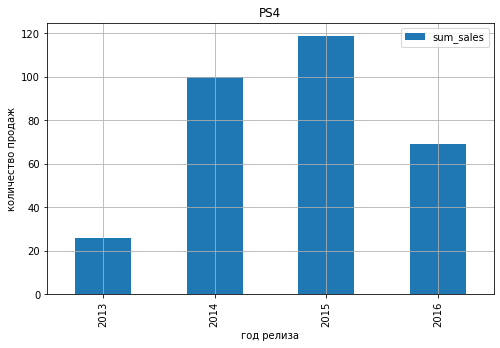

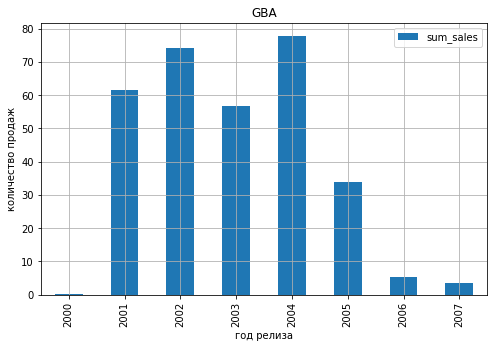

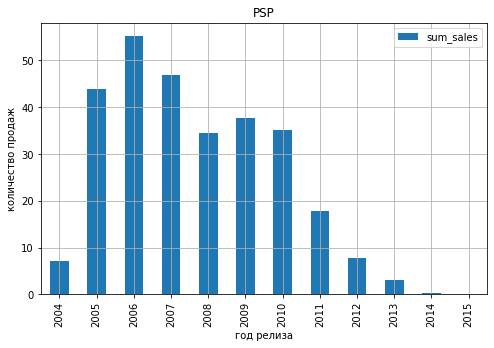

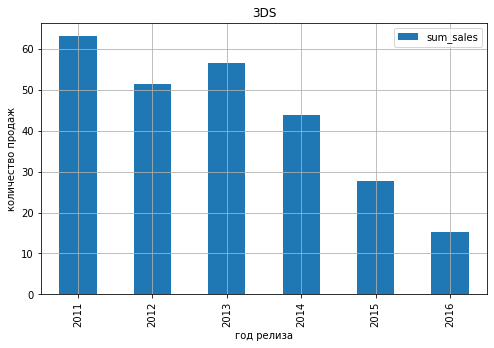

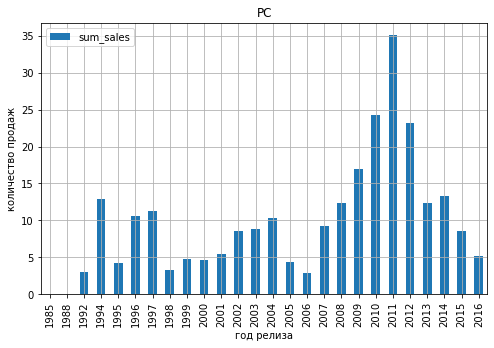

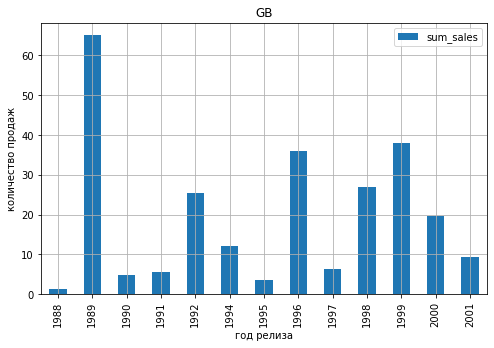

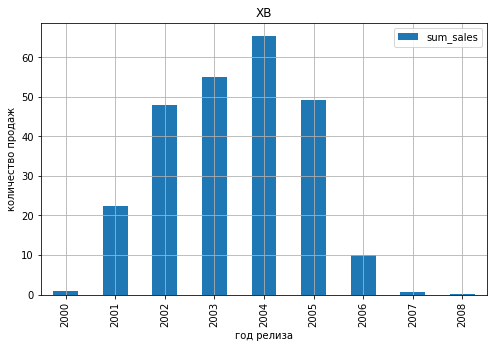

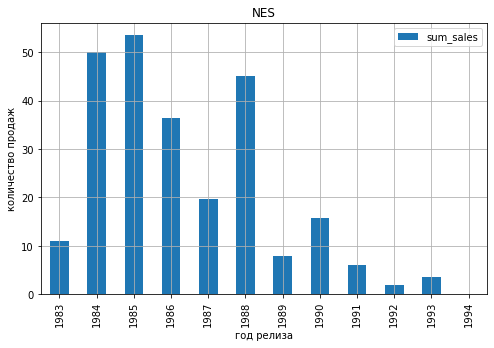

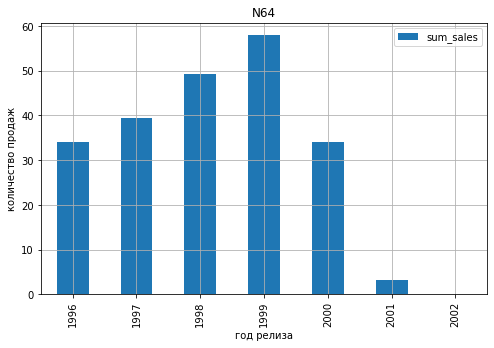

In [35]:
for platform in top15:
    strim[strim['platform'] == platform].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(kind = 'bar', grid=True, figsize=(8,5))
    plt.title('количество продаж от года выпуска')
    plt.xlabel('год релиза')
    plt.ylabel('количество продаж')
    plt.title(platform)

Выводы: 
1. по продажам за все время лидируют 6 платформ: PS2, X360, PS3, Wii, DS, PS. 
2. построили их графики распределения по годам
3. в среднем, согласно графикам, платформа "живет" 7 лет

In [36]:
# Комментарий ревьюера 0
temp = strim.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

3.3 Анализ перспективных платформ

Для построения прогноза на 2017 год, необходимо выбрать актуальный период. Возьмем последние 5 лет, включая 2016 год.

In [37]:
perspective_platforms = strim.query('year_of_release >= 2012')

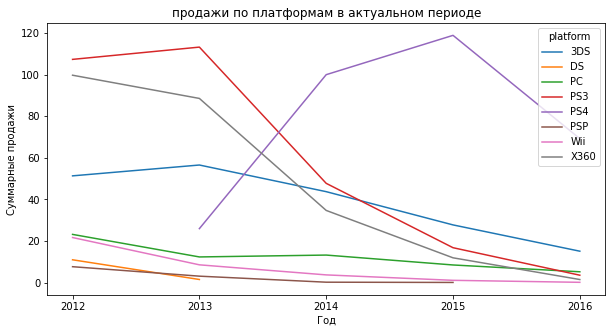

In [38]:
perspective_platforms.query('platform in @top15').pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(10, 5))
plt.title('продажи по платформам в актуальном периоде')
plt.xticks(np.arange(2012, 2017))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

Вывод: на всех платформах наблюдается спад по продажам. На момент 2016 года лидирует по продажам PS4, это связано с тем, что платформа появилась относительно недавно. Больше всего спрос падает на консоли Х360, Wii. Другие платформы либо уже не продаются, либо на них также падает спрос. 
Потенциально прибыльными можно назвать PS4 и PC, которые, согласно гистограмме, показывает спад, но, в целом, продажи можно назвать стабильными. 

3.6 Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.

In [39]:
perspective_platforms['sum_sales'].describe() #методом describe найдем квантили, минимальное, максимальное и среднее значения

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: sum_sales, dtype: float64

В данных явно наблюдаются выбросы, чтобы их не было, зададим параметр ylim от 0 до 2

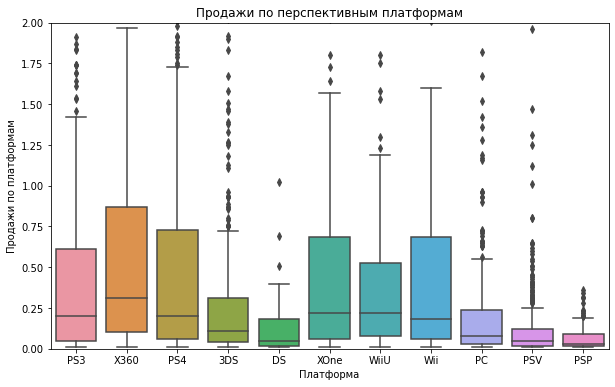

In [40]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=perspective_platforms, x='platform', y='sum_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

Описание результата: медианное значение по всей выборке 0.12, однако данное значение не совпадает с большинством платформ
первый квартиль 0.04, авторой 0.43.

3.7 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Формулировка выводов.

Выберем топ 5 актуальных платформ и построим диаграмму рассеяния между отзывами пользователей и продажами

In [41]:
top5 = perspective_platforms.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().head(5)['platform'].tolist()
top5

['PS4', 'PS3', 'X360', '3DS', 'XOne']

Построим диаграммы рассеивания между отзывами пользователей и продажами для топ 5 актуальных платформ и рассчитаем корреляцию

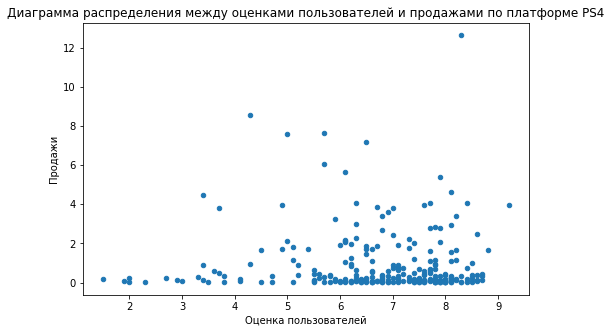

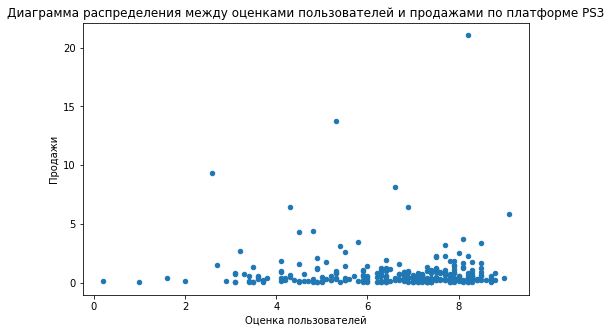

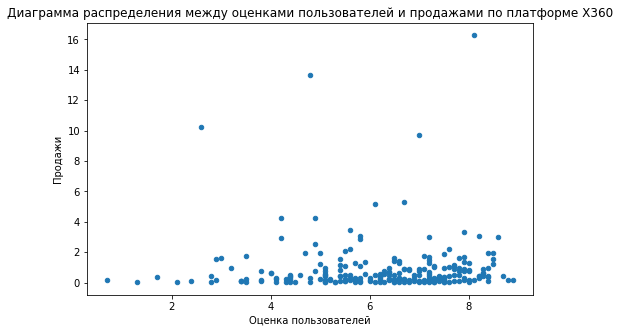

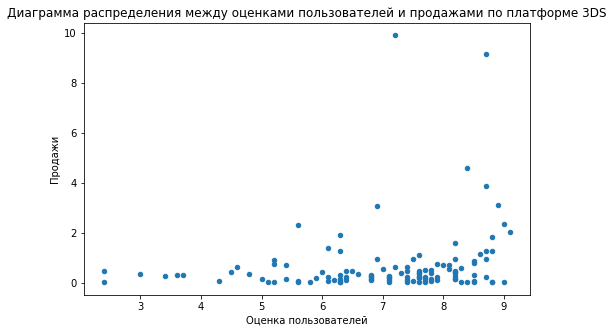

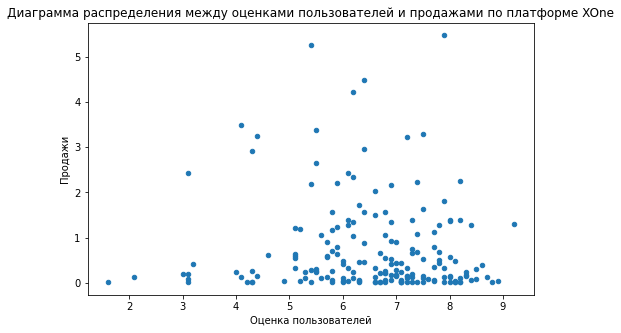

In [42]:
for i in top5:
    perspective_platforms.query('platform == @i and user_score > -1').plot(x='user_score', y='sum_sales', kind='scatter', figsize=(8, 5))
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {i}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.show()

In [43]:
#помчитаем корреляцию для каждой платформы из top5
for i in top5:
    print(f'Корреляция между оценками пользователей и продажами по платформе {i}  =', perspective_platforms.query('platform == @i and user_score > -1')['user_score'].corr(perspective_platforms.query('platform == @i and user_score > -1')['sum_sales']))

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376
Корреляция между оценками пользователей и продажами по платформе PS3  = -0.006205767686051523
Корреляция между оценками пользователей и продажами по платформе X360  = 0.006163978646213326
Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.19758263411038599
Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


Вывод: оценки пользователей практически не влияют на продажи. Больше всех прослеживается зависимость у платформы 3DS 

Построим диаграммы рассеивания между оценками критиков и продажами по топ5 платформам

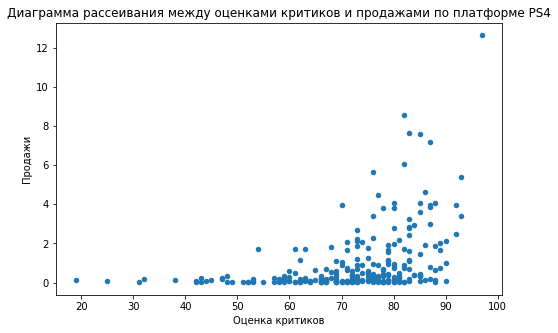

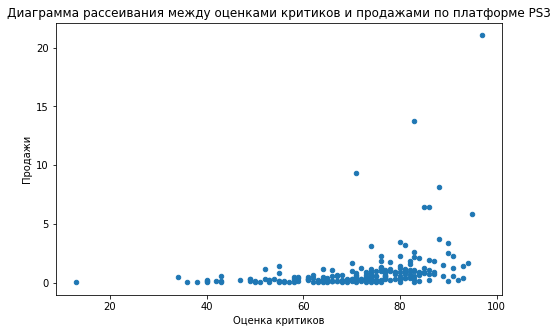

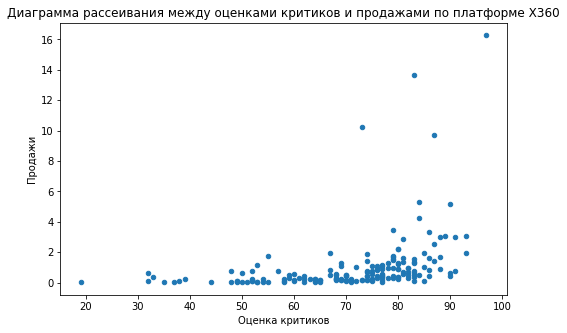

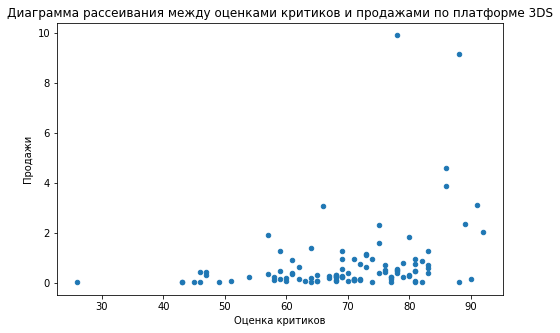

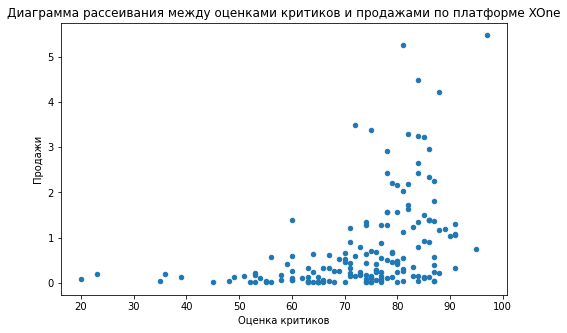

In [44]:
for n in top5:
    perspective_platforms.query('platform == @n and critic_score > -1').plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(8, 5))
    plt.title(f'Диаграмма рассеивания между оценками критиков и продажами по платформе {n}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.show()

Посчитаем корреляцию между отзывами критиков и продажами для топ 5 актуальных платформ

In [45]:
for i in top5:
    print(f'Корреляция между оценками критиков и продажами по платформе {i}  =', perspective_platforms.query('platform == @i and critic_score > -1')['critic_score'].corr(perspective_platforms.query('platform == @i and critic_score > -1')['sum_sales']))

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095
Корреляция между оценками критиков и продажами по платформе PS3  = 0.3341517575509856
Корреляция между оценками критиков и продажами по платформе X360  = 0.3605734888507336
Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3208028695360785
Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


Выводы: Связь между оценками критиков и продажами наблюдается, но небольшая. Корреляция у топ5 платформ колеблется в диапазон 0.32 - 0.41

Посчитаем корреляцию для всего набора данных для оценок пользователей

In [46]:
print(f'Корреляция между оценками пользователей и продажами для всего набора данных  =', perspective_platforms.query('user_score > -1')['user_score'].corr(perspective_platforms['sum_sales']))

Корреляция между оценками пользователей и продажами для всего набора данных  = 0.0041944811069172284


Посчитаем корреляцию для всего набора данных для оценок критиков

In [47]:
print(f'Корреляция между оценками критиков и продажами для всего набора данных  =', perspective_platforms.query('critic_score > -1')['critic_score'].corr(perspective_platforms['sum_sales']))

Корреляция между оценками критиков и продажами для всего набора данных  = 0.30863336128976016


Выводы: наблюдаем слабую зависимость продаж от оценки критиков у всех платформ. Продажи от оценки пользователей практически не зависят

Расчет по Платформе 3DS


user_score    0.197583
sum_sales     1.000000
Name: sum_sales, dtype: float64

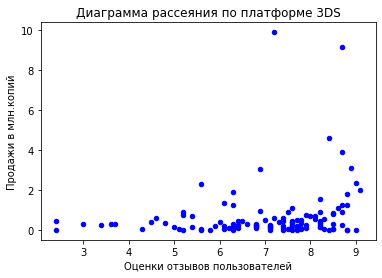

critic_score    0.320803
sum_sales       1.000000
Name: sum_sales, dtype: float64

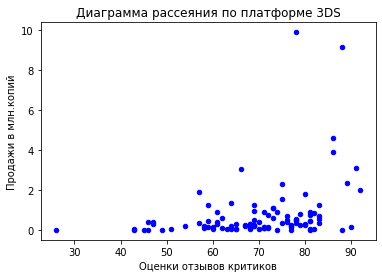

Расчет по Платформе DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PC


user_score   -0.121867
sum_sales     1.000000
Name: sum_sales, dtype: float64

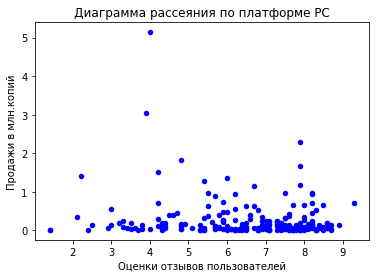

critic_score    0.237243
sum_sales       1.000000
Name: sum_sales, dtype: float64

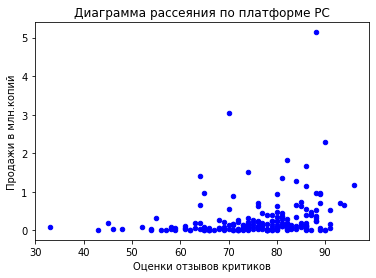

Расчет по Платформе PS3


user_score   -0.006206
sum_sales     1.000000
Name: sum_sales, dtype: float64

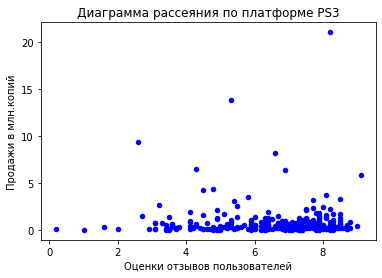

critic_score    0.334152
sum_sales       1.000000
Name: sum_sales, dtype: float64

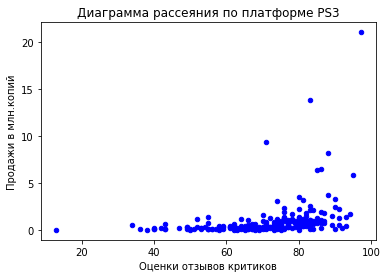

Расчет по Платформе PS4


user_score   -0.031957
sum_sales     1.000000
Name: sum_sales, dtype: float64

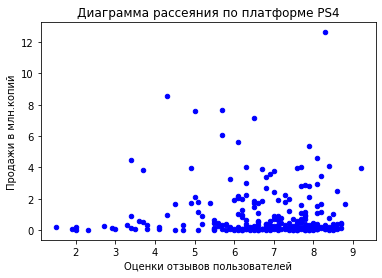

critic_score    0.406568
sum_sales       1.000000
Name: sum_sales, dtype: float64

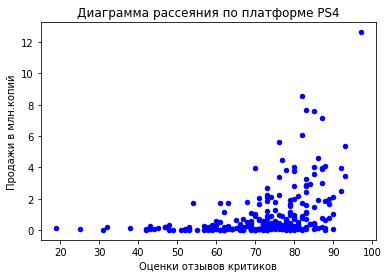

Расчет по Платформе PSP


user_score   -0.802302
sum_sales     1.000000
Name: sum_sales, dtype: float64

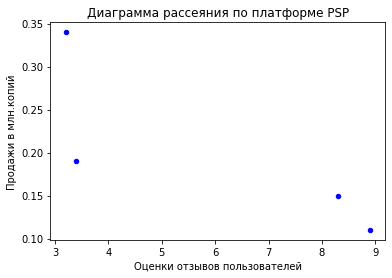

Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score   -0.004339
sum_sales     1.000000
Name: sum_sales, dtype: float64

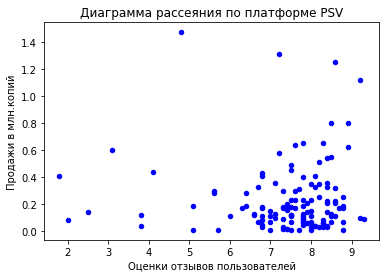

critic_score    0.094488
sum_sales       1.000000
Name: sum_sales, dtype: float64

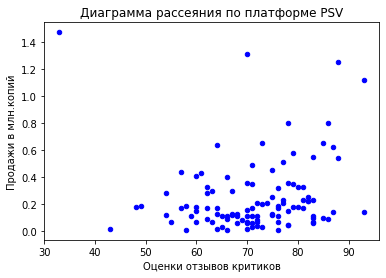

Расчет по Платформе Wii


user_score    0.296197
sum_sales     1.000000
Name: sum_sales, dtype: float64

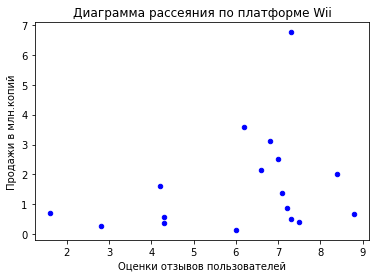

critic_score   -0.424341
sum_sales       1.000000
Name: sum_sales, dtype: float64

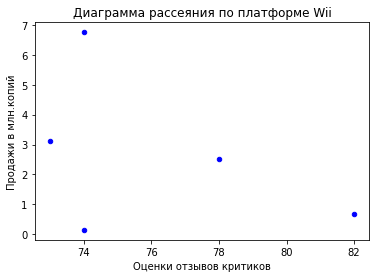

Расчет по Платформе WiiU


user_score    0.400219
sum_sales     1.000000
Name: sum_sales, dtype: float64

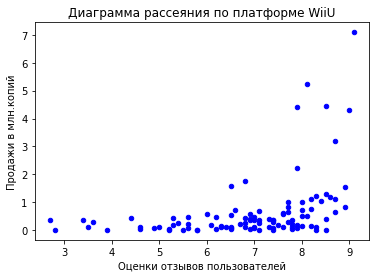

critic_score    0.34838
sum_sales       1.00000
Name: sum_sales, dtype: float64

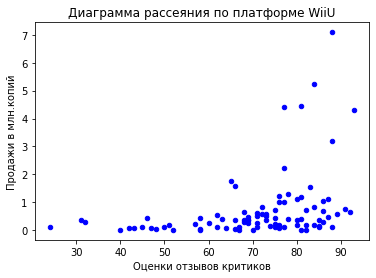

Расчет по Платформе X360


user_score    0.006164
sum_sales     1.000000
Name: sum_sales, dtype: float64

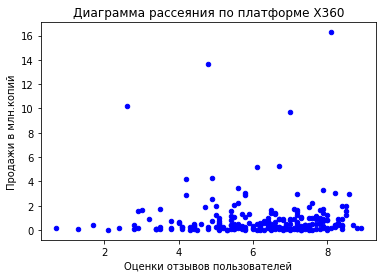

critic_score    0.360573
sum_sales       1.000000
Name: sum_sales, dtype: float64

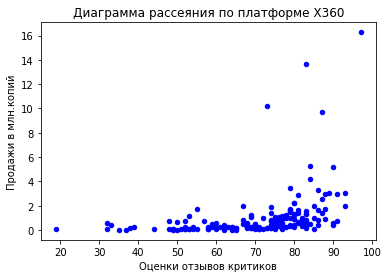

Расчет по Платформе XOne


user_score   -0.068925
sum_sales     1.000000
Name: sum_sales, dtype: float64

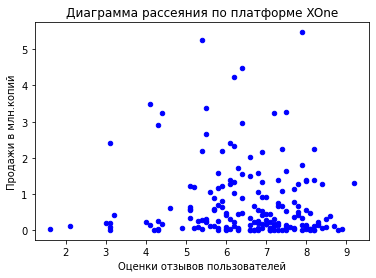

critic_score    0.416998
sum_sales       1.000000
Name: sum_sales, dtype: float64

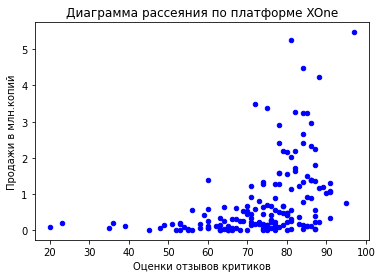

In [74]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
df_sc, y = perspective_platforms.copy(), 'sum_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

3.9 Выводы о самых прибыльных жанрах. Выделяются ли жанры с высокими и низкими продажами?

Изучим самые популярные игры по жанрам

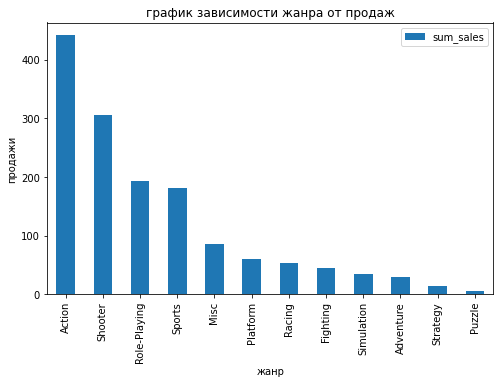

In [48]:
perspective_platforms.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending=False).plot(kind='bar', figsize=(8,5), y= 'sum_sales')
plt.title('график зависимости жанра от продаж')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

Построим диаграмму размаха

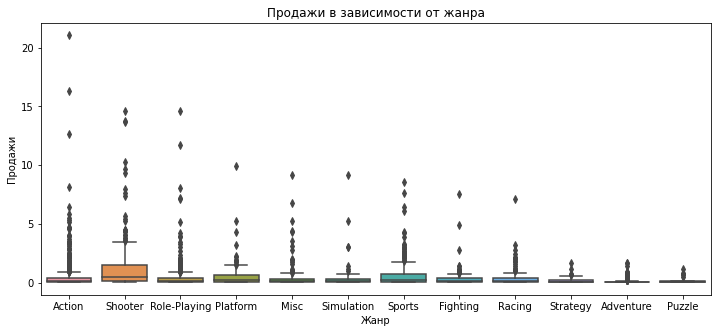

In [49]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=perspective_platforms, x='genre', y='sum_sales')
plt.title('Продажи в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Создадим таблицу, в которой в порядке убывания расположим жанры игр по популярности

In [50]:
perspective_platforms.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').sort_values(ascending=False, by = 'sum_sales')

,sum_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Вывод: Наиболее прибыльный жанр игр Shooter, Sports и Platform. Наименее прибыльные Adventure, Puzzle и Strategy	

Выводы по исследовательскому анализу данных:
1. начиная с 1995 года игры стали продаваться чаще, чаще всего игры продавались в период с 2001 года по 2012. 
2. пик выпуска игр приходится на 2008 год
3. наибольшее количество игр выпускалось с 2002 по 2012 годы.
4. на всех платформах наблюдается спад по продажам. На момент 2016 года лидирует по продажам PS4, это связано с тем, что платформа появилась относительно недавно.
5. потенциально прибыльными можно назвать PS4 и PC
6. между оценками пользователей и продажами слабая связь
7. между оценками критиков и продажами имеется умеренная связь
8. Наиболее прибыльный жанр игр Action, Sports, Role-Playing. Жанры игр с наименьшей прибыльностью Strategy, Puzzle, Adventure

4. Составление портрета пользователя каждого региона.
Определение для пользователя каждого региона (NA, EU, JP):
4.1 Самые популярные платформы (топ-5). Описание различия в долях продаж.

Сначала определим самые популярные платформы (топ 5) для пользователей Северной Америки (NA)

In [51]:
na = perspective_platforms.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na.loc[5:,'platform'] = 'другие'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum()
na = na.iloc[0:6, :]
na

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,другие,90.37


Определим самые популярные платформы (топ 5) для пользователей Европы (EU)

In [52]:
eu = perspective_platforms.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().head(6)
eu.loc[5:,'platform'] = 'другие'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum()
eu = eu.iloc[0:6, :]
eu

,platform,eu_sales
0,PS4,141.09
1,PS3,106.85
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,другие,37.76


Определим самые популярные платформы (топ 5) для пользователей из Японии (JP)

In [53]:
jp = perspective_platforms.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().head(6)
jp.loc[5:,'platform'] = 'другие'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum()
jp = jp.iloc[0:6, :]
jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,другие,10.47


Выводы: пользователи в основном предпочитают платформы, которые произведены в своей стране

Объединим таблицы na и eu в одну total

In [54]:
total = pd.merge(na, eu, left_index=True, right_index=True)
total

,platform_x,na_sales,platform_y,eu_sales
0,X360,140.05,PS4,141.09
1,PS4,108.74,PS3,106.85
2,PS3,103.38,X360,74.52
3,XOne,93.12,XOne,51.59
4,3DS,55.31,3DS,42.64
5,другие,90.37,другие,37.76


Добавим к получившейся таблице jp

In [55]:
total_table = pd.merge(total, jp, left_index=True, right_index=True) #объединили получившуюся таблицу total и jp в одну total_table
total_table

,platform_x,na_sales,platform_y,eu_sales,platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01
5,другие,90.37,другие,37.76,другие,10.47


Теперь посчитаем долю продаж по самым популярным платформам в зависимости от региона

In [56]:
total_table.na_sales = total_table.na_sales/total_table.na_sales.sum()*100
total_table.eu_sales = total_table.eu_sales/total_table.eu_sales.sum()*100
total_table.jp_sales = total_table.jp_sales/total_table.jp_sales.sum()*100

In [57]:
total_table

,platform_x,na_sales,platform_y,eu_sales,platform,jp_sales
0,X360,23.698326,PS4,31.046320,3DS,47.826324
1,PS4,18.400257,PS3,23.511938,PS3,19.225321
2,PS3,17.493274,X360,16.397844,PSV,11.462192
3,XOne,15.757145,XOne,11.352184,PS4,8.694705
4,3DS,9.359189,3DS,9.382770,WiiU,7.087601
5,другие,15.291808,другие,8.308945,другие,5.703857


Выводы: Выделили топ 5 платформ для каждого региона. Как правило, чаще всего пользователи используют платформу отечественного производителя. 

4.2 Самые популярные жанры (топ-5). Пояснение разницы.

Посмотрим самые популярные жанры игр (топ 5) в Северной Америке (na)

In [58]:
na = perspective_platforms.pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
na.loc[5:,'genre'] = 'другие'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum()
na = na.iloc[0:6, :]
na

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,другие,84.64


Посмотрим самые популярные жанры игр (топ 5) в Европе (eu)

In [59]:
eu = perspective_platforms.pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
eu.loc[5:,'genre'] = 'другие'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum()
eu = eu.iloc[0:6, :]
eu

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.08
3,Role-Playing,48.53
4,Racing,27.29
5,другие,89.10


Посмотрим самые популярные жанры игр (топ 5) в Японии (jp)

In [60]:
jp = perspective_platforms.pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
jp.loc[5:,'genre'] = 'другие'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum()
jp = jp.iloc[0:6, :]
jp

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,другие,41.63


По аналогии с предыдущим пунктом, объединим две первых таблицы в одну

In [61]:
total = pd.merge(na, eu, left_index=True, right_index=True)
total

,genre_x,na_sales,genre_y,eu_sales
0,Action,177.84,Action,159.34
1,Shooter,144.77,Shooter,113.47
2,Sports,81.53,Sports,69.08
3,Role-Playing,64.00,Role-Playing,48.53
4,Misc,38.19,Racing,27.29
5,другие,84.64,другие,89.10


Добавим к получившейся таблице jp

In [62]:
total_table = pd.merge(total, jp, left_index=True, right_index=True)
total_table

,genre_x,na_sales,genre_y,eu_sales,genre,jp_sales
0,Action,177.84,Action,159.34,Role-Playing,65.44
1,Shooter,144.77,Shooter,113.47,Action,52.80
2,Sports,81.53,Sports,69.08,Misc,12.86
3,Role-Playing,64.00,Role-Playing,48.53,Simulation,10.41
4,Misc,38.19,Racing,27.29,Fighting,9.44
5,другие,84.64,другие,89.10,другие,41.63


теперь посчитаем процент популярности каждого жанра

In [63]:
total_table.na_sales = total_table.na_sales/total_table.na_sales.sum()*100
total_table.eu_sales = total_table.eu_sales/total_table.eu_sales.sum()*100
total_table.jp_sales = total_table.jp_sales/total_table.jp_sales.sum()*100
total_table

,genre_x,na_sales,genre_y,eu_sales,genre,jp_sales
0,Action,30.092898,Action,31.439790,Role-Playing,33.980683
1,Shooter,24.497013,Shooter,22.389061,Action,27.417177
2,Sports,13.795963,Sports,13.630355,Misc,6.677744
3,Role-Playing,10.829653,Role-Playing,9.575581,Simulation,5.405546
4,Misc,6.462257,Racing,5.384661,Fighting,4.901859
5,другие,14.322216,другие,17.580553,другие,21.616990


Вывод: Выделили топ 5 самых популярных жанров игр в зависимости от региона.
Стоит отметить, что "вкусы" пользователей Северной Америки и Европы практически совпадают. Япония выделяется на фоне остальных регионов, самые популярные жанры в этом регионе Role-Playing и Action. Также стоит отметить, что чуть больше четверти всех регионов предпочитают различные другие платформы

4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [64]:
perspective_platforms['region'] = perspective_platforms['na_sales'] + perspective_platforms['eu_sales'] + perspective_platforms['jp_sales']
perspective_platforms['region']

16       17.09
23       14.86
31       12.25
33       13.82
34       11.37
         ...  
16703     0.01
16707     0.01
16710     0.01
16712     0.01
16714     0.01
Name: region, Length: 2885, dtype: float64

In [65]:
ESRB_reit = perspective_platforms.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_reit

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


In [66]:
perspective_platforms['rating'].unique() #проверим не потерялись ли какие-то данные с помощью метода unique

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

теперь посчитаем процент продаж в зависимости от рейтинга ESRB для каждого региона

In [67]:
ESRB_reit.na_sales = ESRB_reit.na_sales/ESRB_reit.na_sales.sum()*100
ESRB_reit.eu_sales = ESRB_reit.eu_sales/ESRB_reit.eu_sales.sum()*100
ESRB_reit.jp_sales = ESRB_reit.jp_sales/ESRB_reit.jp_sales.sum()*100
ESRB_reit

,eu_sales,jp_sales,na_sales
rating,,,
E,22.300270,14.710770,19.352928
E10+,10.925199,4.252778,12.809449
M,38.270752,11.008412,39.184730
T,10.449675,13.511268,11.171464
unknown,18.054103,56.516772,17.481429


Вывод: рейтинг ESRB действительно влияет на количество продаж. В регионах NA и EU наибольший по популярности рейтинг E, 19 и 22% соответственно. Рейтинг АО практически не встречается, а в Японии отсутствует. Игры с рейтином RP в Японии и Северной Америке не продавались. 
Также отметить стоит, что игры с неуказанным рейтингом unknown в Японии самые популярные почти 57%.

5. Проверка гипотез
5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвенем гипотезы:
Н0: Средний пользовательский рейтинг платформы Xbox One = среднему пользовтельскому рейтингу платформы PC
Н1: Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовтельскому рейтингу платформы PC

In [68]:
xboxone = perspective_platforms.query('platform == "XOne" and user_score > -1')
xboxone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [69]:
pc = perspective_platforms.query('platform == "PC" and user_score > -1')
pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Проверим гипотезу:

In [70]:
alpha = 0.05
results = st.ttest_ind(xboxone['user_score'], pc['user_score'], alternative='two-sided')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовтельскому рейтингу платформы PC при установленном уровне значимости 5%.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний пользовательский рейтинг платформы Xbox One = среднему пользовтельскому рейтингу платформы PC при установленном уровне значимости 5%.')

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу. Средний пользовательский рейтинг платформы Xbox One = среднему пользовтельскому рейтингу платформы PC при установленном уровне значимости 5%.


5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Выдвенем гипотезы:
Н0: Средний пользовательский рейтинг жанра Action = среднему пользовательскому жанру Sports
Н1: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому жанру Sports

In [71]:
genre_action = perspective_platforms.query('genre == "Action" and user_score > -1')
genre_action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [72]:
genre_sports = perspective_platforms.query('genre == "Sports" and user_score > -1')
genre_sports['user_score'].describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Проверим гипотезу:

In [73]:
alpha = 0.05
results = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'],alternative='two-sided')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому жанру Sports при установленном уровне значимости 5%.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний пользовательский рейтинг жанра Action = среднему пользовательскому жанру Sports при установленном уровне значимости 5%.')

4.8045233804629176e-26
Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому жанру Sports при установленном уровне значимости 5%.


Выводы по гипотезам:
1 гипотеза: Не получилось отвергнуть нулевую гипотезу. Средний пользовательский рейтинг платформы Xbox One = среднему пользовтельскому рейтингу платформы PC при установленном уровне значимости 5%.
2 гипотеза: Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому жанру Sports при установленном уровне значимости 5%.

Как были сформулированы нулевая и альтернативные гипотезы?
1 гипотеза: задание сформулировано следующим образом: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", что совпадает с формулировкой нулевой гипотезы (она определяется как равно). В альтернативной гипотезе ставится вопрос про равенство, соответственно надо провести двухстороннюю alternative='two-sided'
2 гипотеза: задание сформулировано следующим образом: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные", однако нулевая гипотеза всегда должна обозначать равенство, поэтому была выдвинута нулевая гипотеза "Средний пользовательский рейтинг жанра Action = среднему пользовательскому жанру Sports". Если эта гипотеза отвергается, значит рейтинги разные. В этом случае также лучше провести двухстороннюю alternative='two-sided'.

6. Общий вывод по проекту:
1. Загрузили датафрейм и изучили данные в нем:
- В рассматриваемом датафрейме 11 колонок, 16715 записей. 
- Названия столбцов не соответствуют правилам хорошего стиля, их необходимо привести к нижнему регистру. 
- Тип данных в столбцах Year_of_Release нужно заменить на int, User_Score на float
- Многие столбцы содержат пропущенные значения NaN
2. Предобработка данных:
- Привели столбцы к нижнему регистру согласно правилам хорошего стиля
- Явных дубликатов не оказалось, после команды .drop_duplicates() размеры датайфрейма не изменились
- Тип данных float64 в столбце year_of_release e заменили на int, тип данных столбца user_score object заменили на float
- Нашли пропуски. Пропусков в столбце name 2, year_of_release 269, critic_score 8578, user_score 6701, rating 6766
- Пропуски в столбцах name и year_of_release 269 удалили. Возможно к потере данных привел человеческий фактор.
- Пропусков в столбцах critic_score, user_score и rating достаточно много, пропуски в user_score заменили на -1, пропуски в critic_score заменили на -1, пропуски в rating заменили на unknown
- В столбце user_score встречается аббревиатура 'tbd'. Согласно открытым источникам, данное сокращение расшифровывается как To Be Determined, то есть "Будет определено". В нашей работе это означает, что рейтинг игры не определен, поэтому целесообразно для дальшейшей работы заменить его на -1. Возможно игра недавно в релизе и ещё не собрала оценки. 
- Посчитали суммарные продажи и записали данные в новый столбец sum_sales
3. Исследовательский анализ данных:
- начиная с 1995 года игры стали продаваться чаще, чаще всего игры продавались в период с 2001 года по 2012. 
- пик выпуска игр приходится на 2008 год
- наибольшее количество игр выпускалось с 2002 по 2012 годы.
- на всех платформах наблюдается спад по продажам. На момент 2016 года лидирует по продажам PS4, это связано с тем, что платформа появилась относительно недавно.
- потенциально прибыльными можно назвать PS4 и PC
- между оценками пользователей и продажами слабая связь
- между оценками критиков и продажами имеется умеренная связь
- Наиболее прибыльный жанр игр Action, Sports, Role-Playing. Жанры игр с наименьшей прибыльностью Strategy, Puzzle, Adventure
4. Составление портрета пользователя каждого региона.
- Выделили топ 5 самых популярных жанров игр в зависимости от региона.
Стоит отметить, что "вкусы" пользователей Северной Америки и Европы практически совпадают. Япония выделяется на фоне остальных регионов, самые популярные жанры в этом регионе Role-Playing и Action. Также стоит отметить, что чуть больше четверти всех регионов предпочитают различные другие платформы
- рейтинг ESRB действительно влияет на количество продаж. В регионах NA и EU наибольший по популярности рейтинг E, 33 и 31.5% соответственно. Рейтинг АО практически не встречается, а в Японии отсутствует. Игры с рейтином RP в Японии и Северной Америке не продавались. 
Также отметить стоит, что игры с неуказанным рейтингом unknown в Японии самые популярные 47%.
5. Проверка гипотез:
1 гипотеза: Не получилось отвергнуть нулевую гипотезу. Средний пользовательский рейтинг платформы Xbox One = среднему пользовтельскому рейтингу платформы PC при установленном уровне значимости 5%.
2 гипотеза: Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому жанру Sports при установленном уровне значимости 5%.

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Николай! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
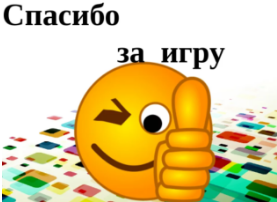